In [42]:
from modules.stats_v3 import *
from modules.helper_functions_v3 import *
from modules.plot_functions_v3 import *
import config

import random

import __main__
from sys import argv
from os.path import join, isdir
from os import makedirs

In [43]:
plot_pretty()

In [48]:
suite_name = 'caterpillar_19_LX14'
#suite_name = 'iBurr'
saveimage = False
executed_as_300kpc = True
executed_as_python = hasattr(__main__, '__file__')

seed = random.randint(0, 100000)

if executed_as_python:
    import matplotlib
    matplotlib.use('Agg')
    saveimage = True
    suite_name = argv[1]
    executed_as_300kpc = argv[2]=='1'

select_by_Rvir = not executed_as_300kpc
name_extension = "_300kpc" if executed_as_300kpc else ""

base_dir = '../data'
gen_data_dir  = base_dir + '/gendata'
if suite_name[0] == 'i':
  catalog = 'elvis_isolated'
  suite_dir = join(config.raw_dir, config.elvis_isolated_raw_name)
  suite_name_decorated = elvis_name_template.substitute(suite_name=suite_name)
else:
  catalog = 'caterpillar'
  suite_dir = join(config.raw_dir, config.caterpillar_raw_name)
  suite_name_decorated = caterpillar_name_template.substitute(suite_name=suite_name)

data_dir = join(config.gendata_dir, config.gendata_name_template.substitute(catalog=catalog, _300kpc=name_extension, _surv_probs=''))
data_surv_probs_dir = join(config.gendata_dir, config.gendata_name_template.substitute(catalog=catalog, _300kpc=name_extension, _surv_probs='_surv_probs'))
pre_save_dir = join(config.result_dir, f'{catalog}{name_extension}')
if not isdir(pre_save_dir):
  makedirs(pre_save_dir)
save_dir = join(pre_save_dir, suite_name)
if not isdir(save_dir):
  makedirs(save_dir)
brightest_dir = join(config.gendata_dir, config.gendata_brightest_name_template.substitute(catalog=catalog, _300kpc=name_extension))

In [49]:
data = read_halo(suite_name_decorated, suite_dir)

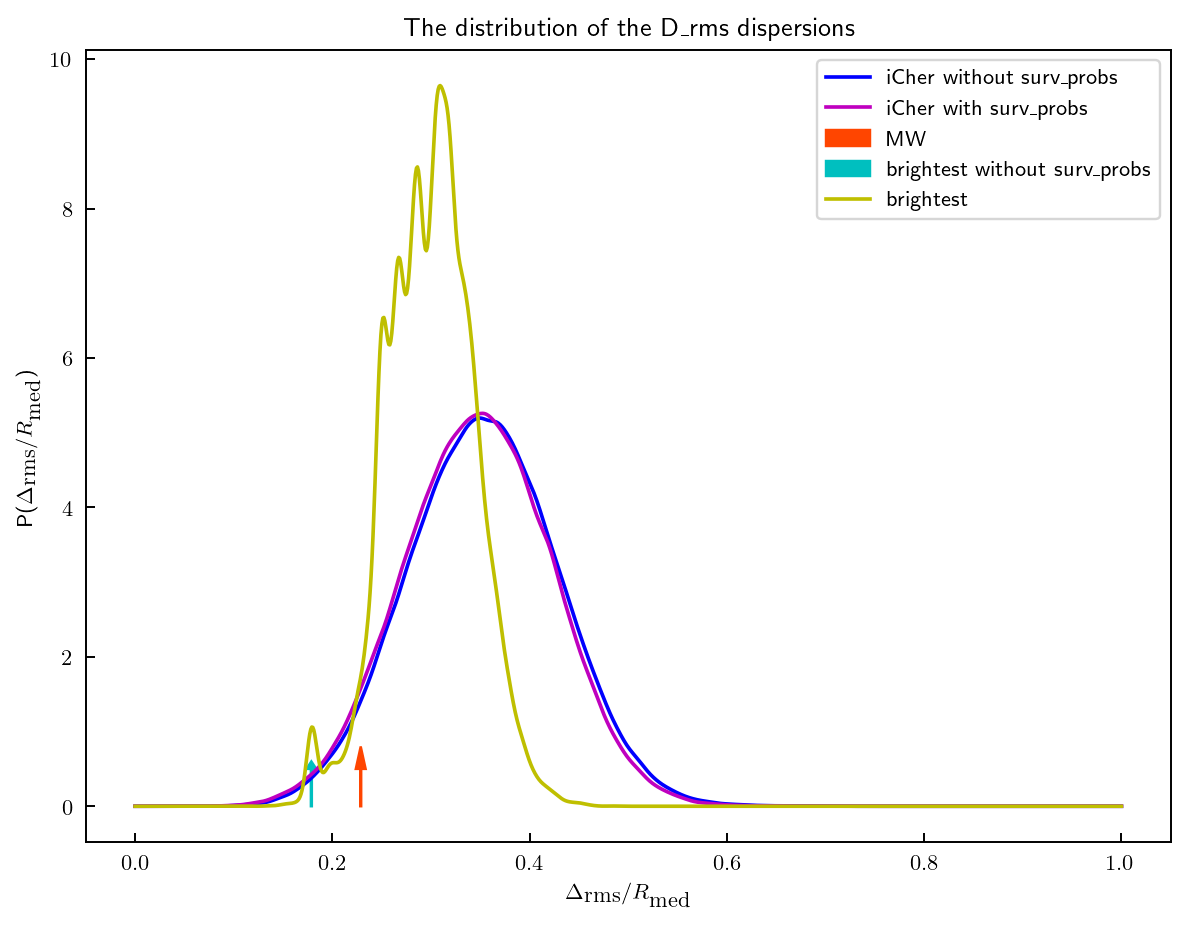

In [50]:
plot_distribution_D_rms_dispersion(suite_name, data_dir, data_surv_probs_dir, data, brightest_dir=brightest_dir, select_by_Rvir=select_by_Rvir, seed=seed, save_dir=save_dir, saveimage=saveimage)

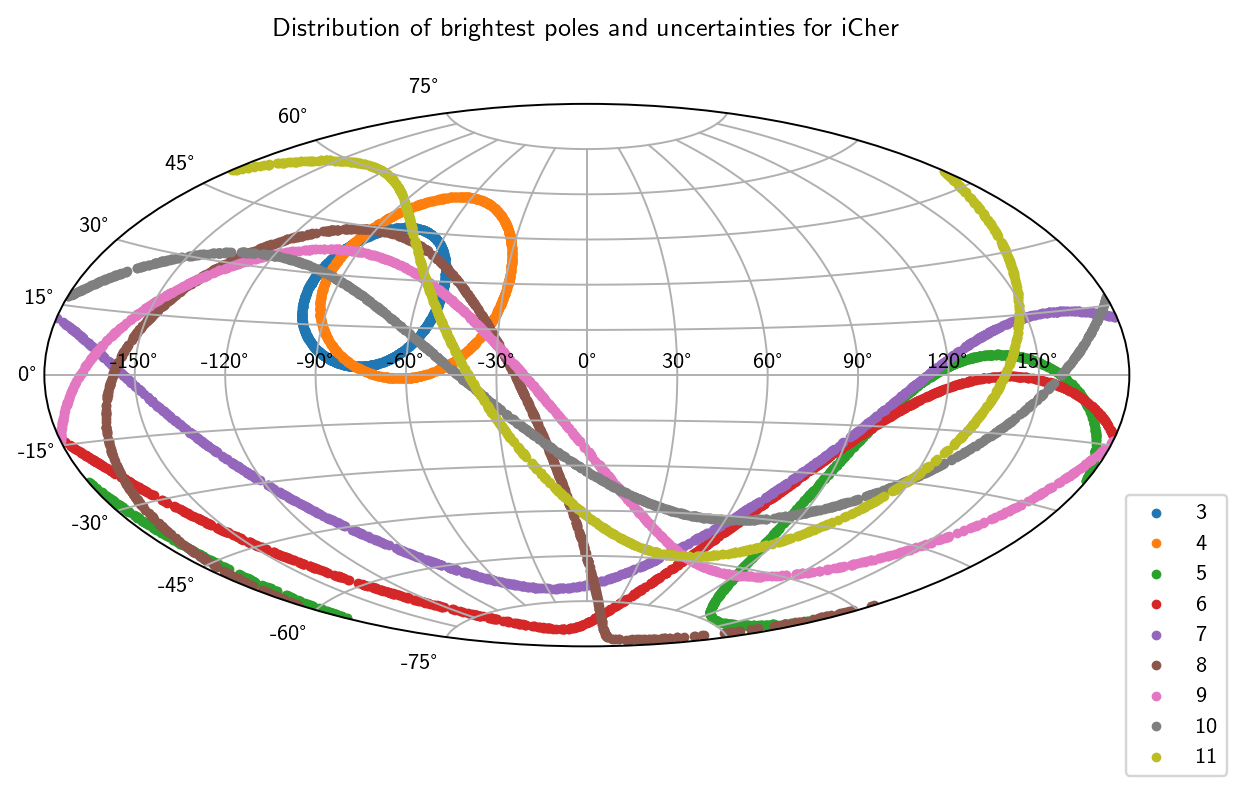

In [30]:
plot_poles_brightest(suite_name, data, select_by_Rvir=select_by_Rvir, seed=seed, save_dir=save_dir, saveimage=saveimage)

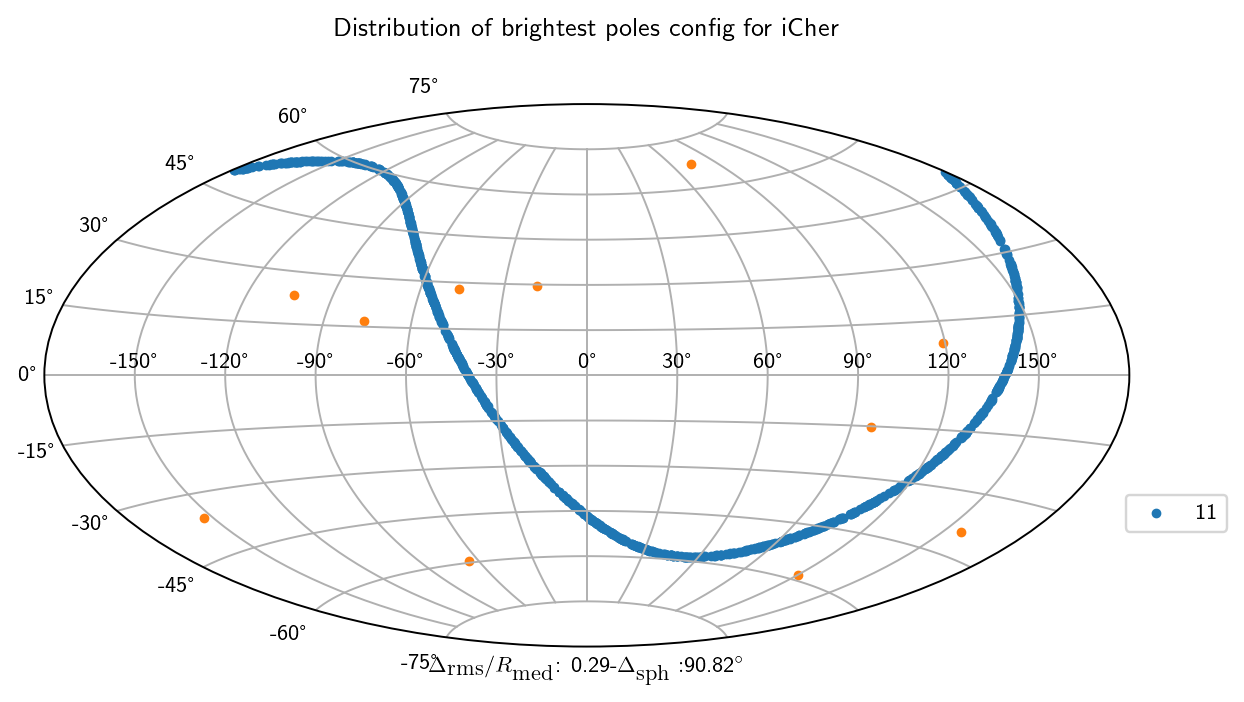

In [31]:
plot_poles_brightest_with_config(suite_name, data, select_by_Rvir=select_by_Rvir, seed=seed, save_dir=save_dir, saveimage=saveimage)

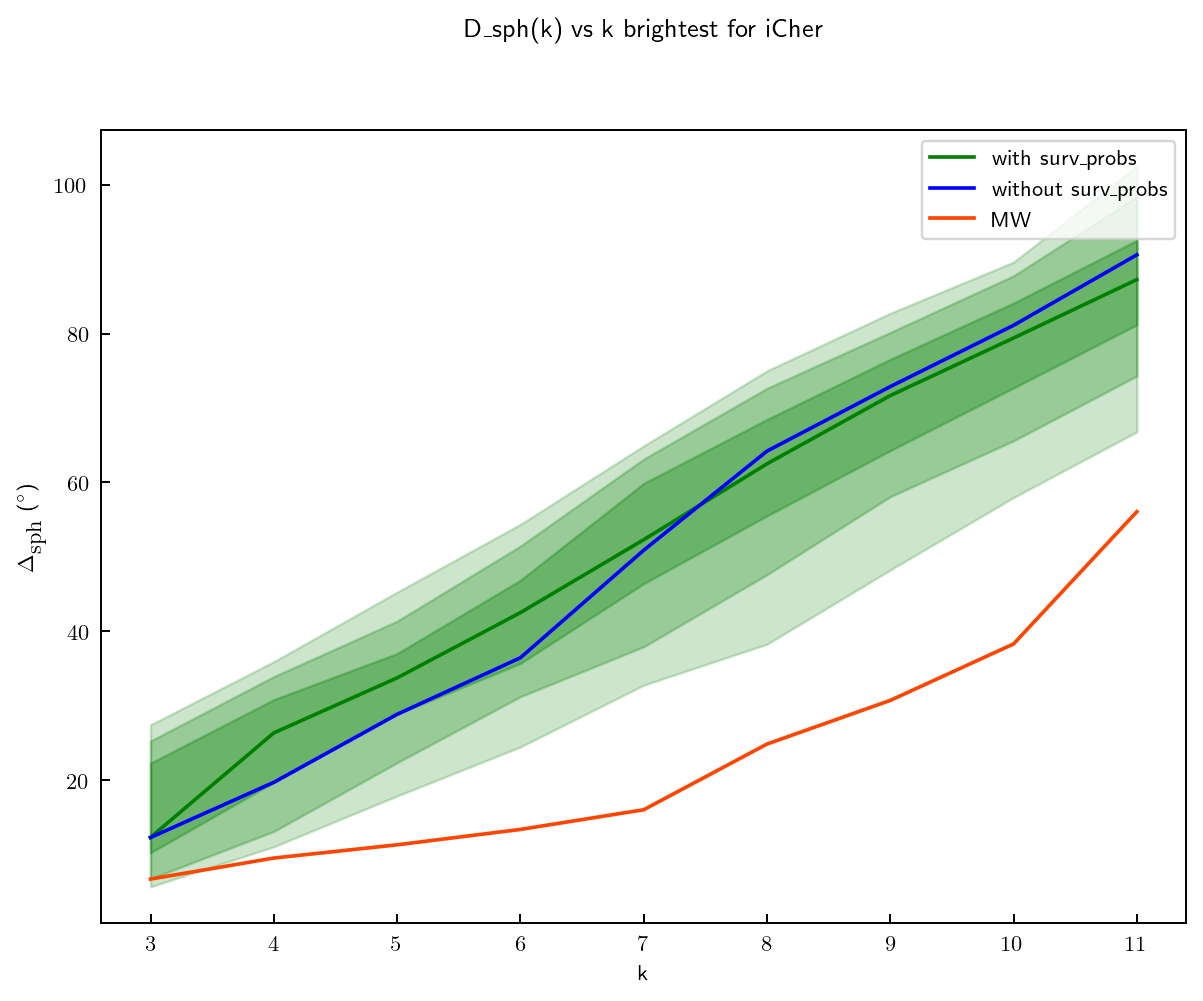

In [47]:
plot_D_sph_vs_k_brightest(suite_name, data, brightest_dir=brightest_dir, select_by_Rvir=select_by_Rvir, seed=seed, save_dir=save_dir, saveimage=saveimage)

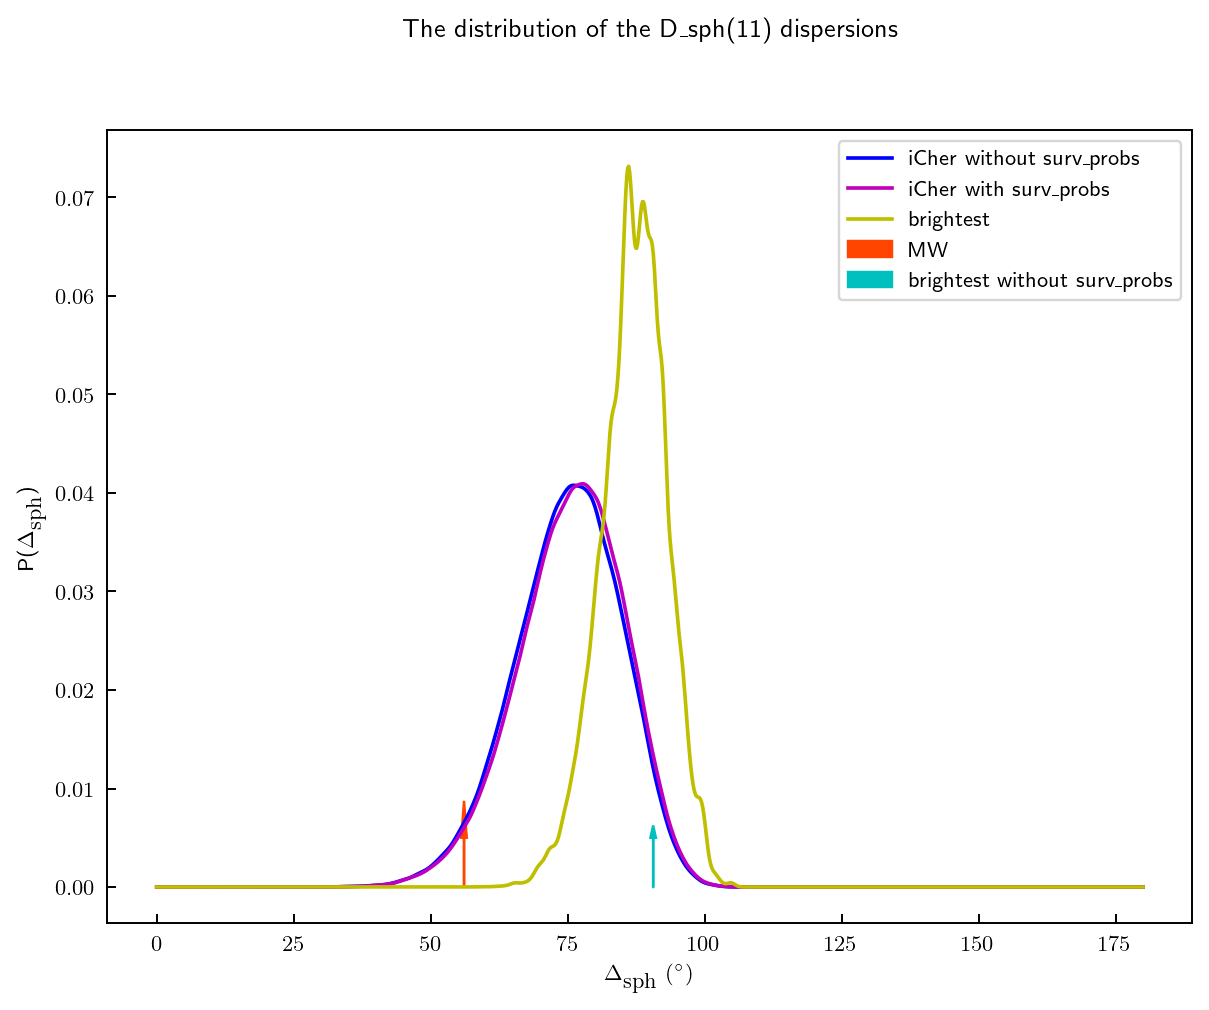

In [33]:
plot_distribution_D_sph_dispersion(suite_name, data_dir, data_surv_probs_dir, data, brightest_dir=brightest_dir, select_by_Rvir=select_by_Rvir, seed=seed, save_dir=save_dir, saveimage=saveimage)

/Users/khanhnp/Desktop/NewProject/SatelliteAnisotropy/src/modules/plot_functions_v3.py:66: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(X, Y, H, linewidths=(1.0,0.75, 0.5, 0.25), colors='black', levels = sorted(lvls),


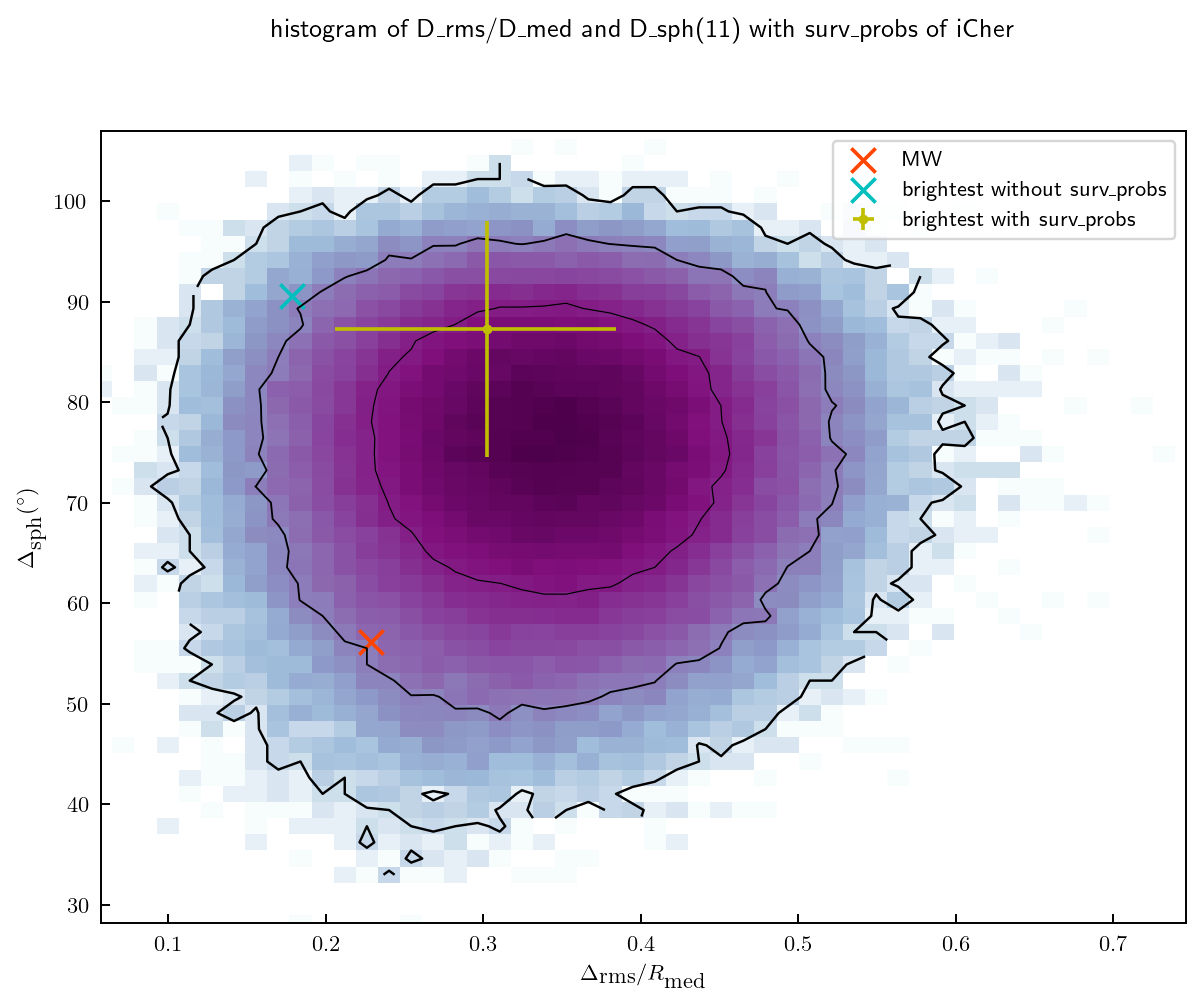

In [34]:
plot_hist_D_rms_over_R_med_vs_D_sph(suite_name, data_surv_probs_dir, data, brightest_dir=brightest_dir, is_surv_probs=True, k=11, select_by_Rvir=select_by_Rvir, seed=seed, save_dir=save_dir, saveimage=saveimage)

/Users/khanhnp/Desktop/NewProject/SatelliteAnisotropy/src/modules/plot_functions_v3.py:66: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(X, Y, H, linewidths=(1.0,0.75, 0.5, 0.25), colors='black', levels = sorted(lvls),


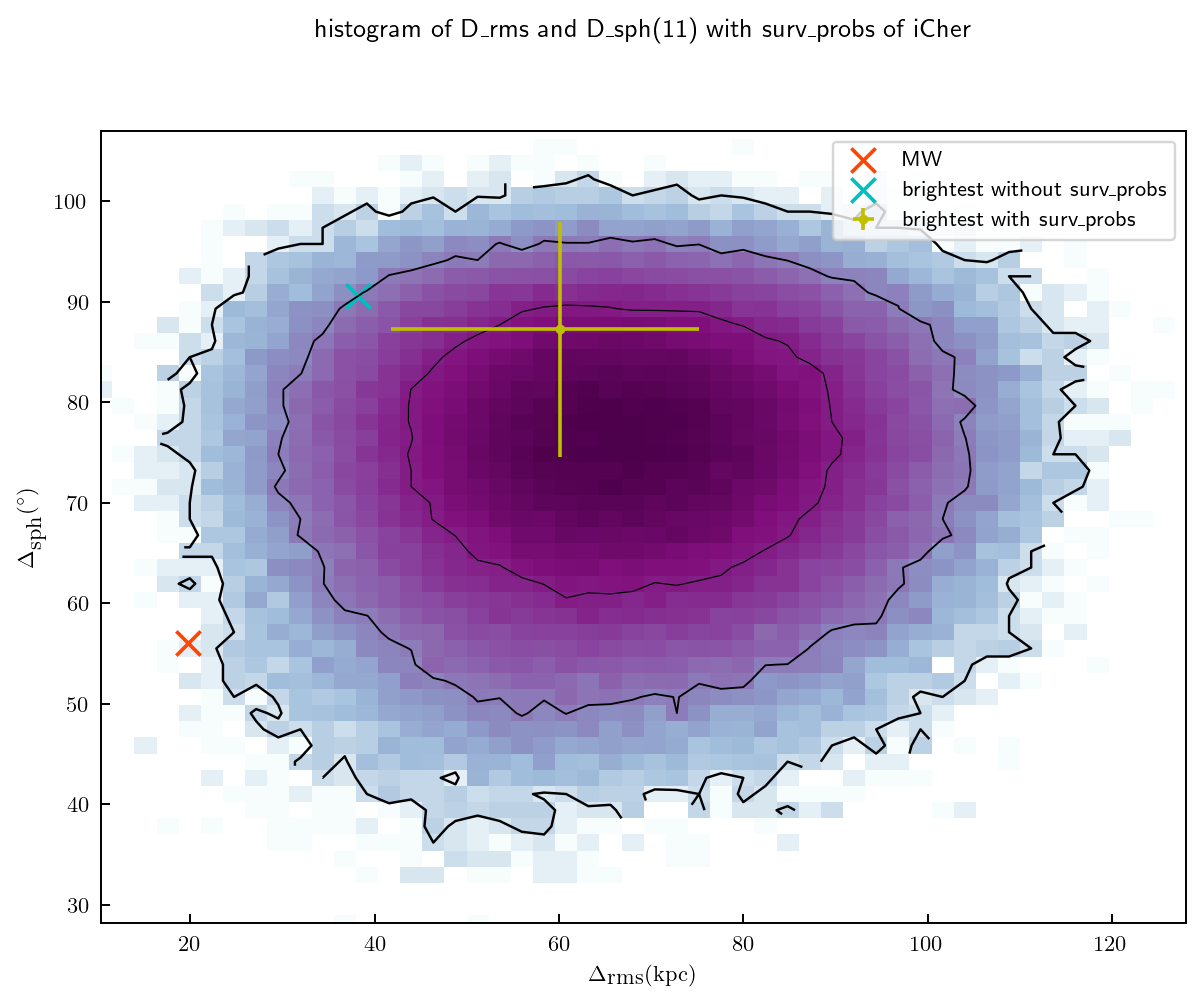

In [35]:
plot_hist_D_rms_vs_D_sph(suite_name, data_surv_probs_dir, data, brightest_dir=brightest_dir, is_surv_probs=True, k=11, select_by_Rvir=select_by_Rvir, seed=seed, save_dir=save_dir, saveimage=saveimage)

/Users/khanhnp/Desktop/NewProject/SatelliteAnisotropy/src/modules/plot_functions_v3.py:66: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(X, Y, H, linewidths=(1.0,0.75, 0.5, 0.25), colors='black', levels = sorted(lvls),


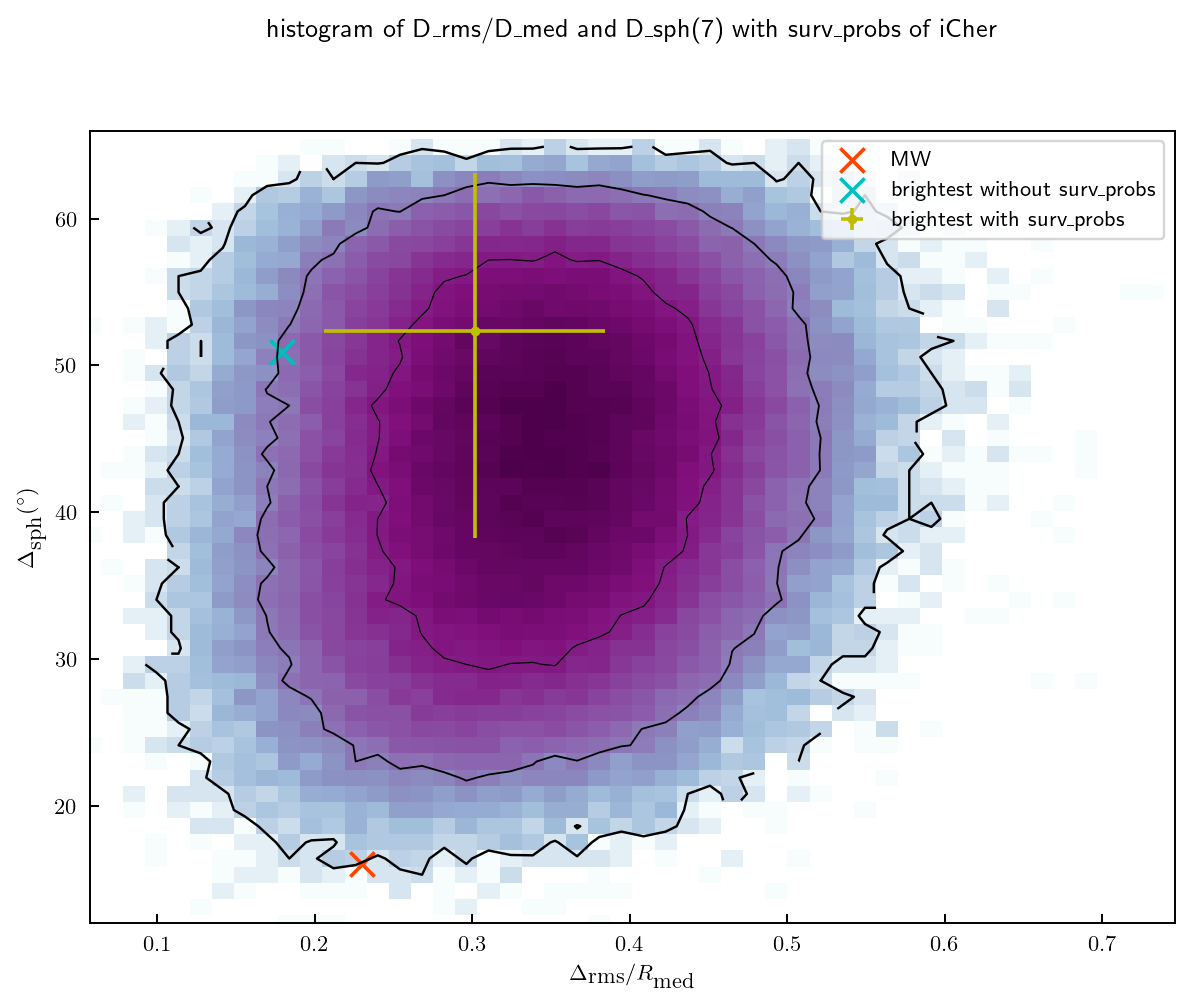

In [36]:
plot_hist_D_rms_over_R_med_vs_D_sph(suite_name, data_surv_probs_dir, data, brightest_dir=brightest_dir, is_surv_probs=True, k=7, select_by_Rvir=select_by_Rvir, seed=seed, save_dir=save_dir, saveimage=saveimage)

/Users/khanhnp/Desktop/NewProject/SatelliteAnisotropy/src/modules/plot_functions_v3.py:66: UserWarning: Log scale: values of z <= 0 have been masked
  ax.contour(X, Y, H, linewidths=(1.0,0.75, 0.5, 0.25), colors='black', levels = sorted(lvls),


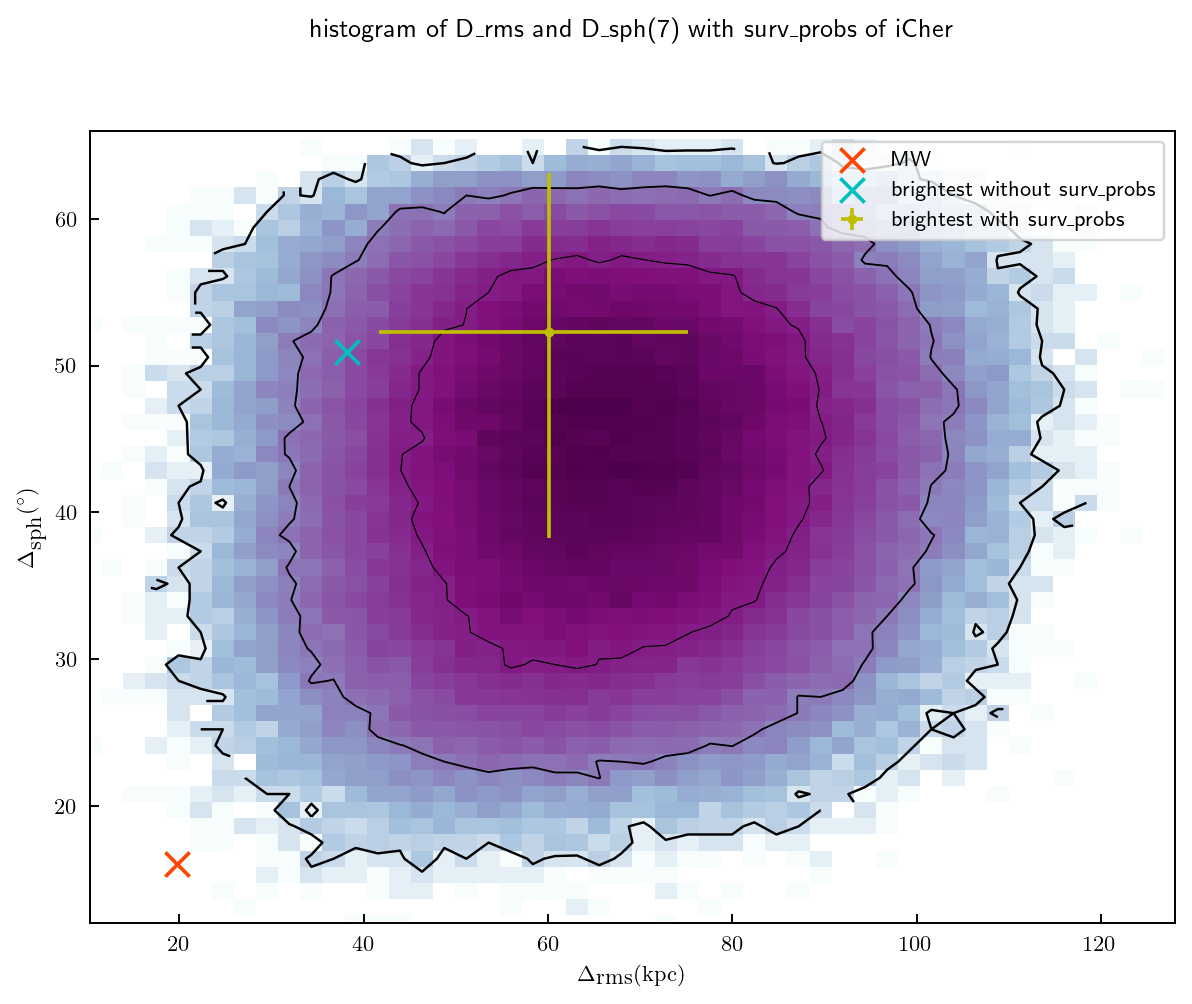

In [37]:
plot_hist_D_rms_vs_D_sph(suite_name, data_surv_probs_dir, data, brightest_dir=brightest_dir, is_surv_probs=True, k=7, select_by_Rvir=select_by_Rvir, seed=seed, save_dir=save_dir, saveimage=saveimage)